In [3]:
import h5py
# import pynwb
import dendro.client as prc
import remfile


# Load project D-000128
project = prc.load_project('a016a71a')

# Lazy load imported/000128/sub-Jenkins/sub-Jenkins_ses-full_desc-train_behavior+ecephys.nwb
nwb_file = project.get_file('imported/000128/sub-Jenkins/sub-Jenkins_ses-full_desc-train_behavior+ecephys.nwb')
nwb_remf = remfile.File(nwb_file)
nwb_h5 = h5py.File(nwb_remf, 'r')
# io = pynwb.NWBHDF5IO(file=nwb_h5, mode='r')
# nwb = io.read()

In [4]:
timestamps = nwb_h5['/processing/behavior/cursor_pos/timestamps'][:]
cursor_pos = nwb_h5['/processing/behavior/cursor_pos/data'][:]
spike_times = nwb_h5['/units/spike_times'][:]
spike_times_index = nwb_h5['/units/spike_times_index'][:]

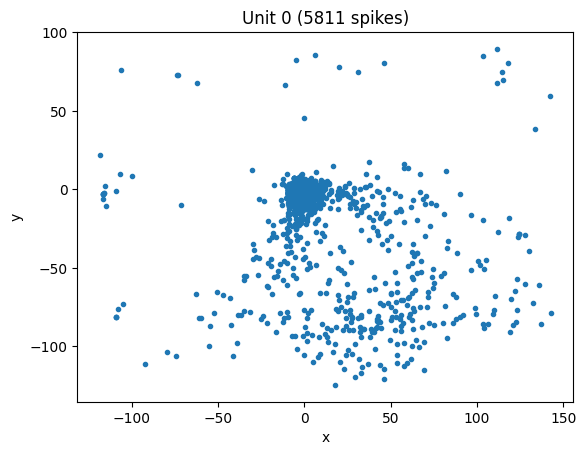

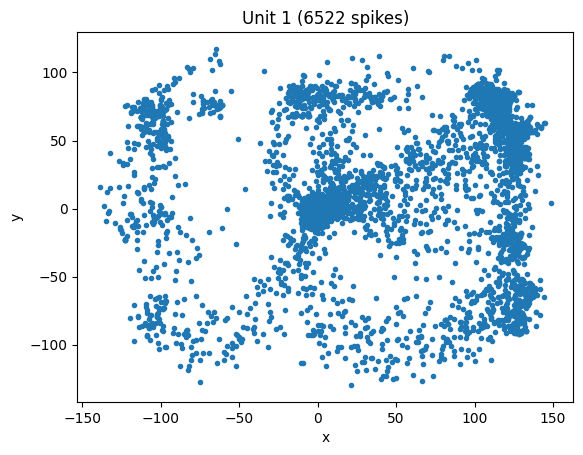

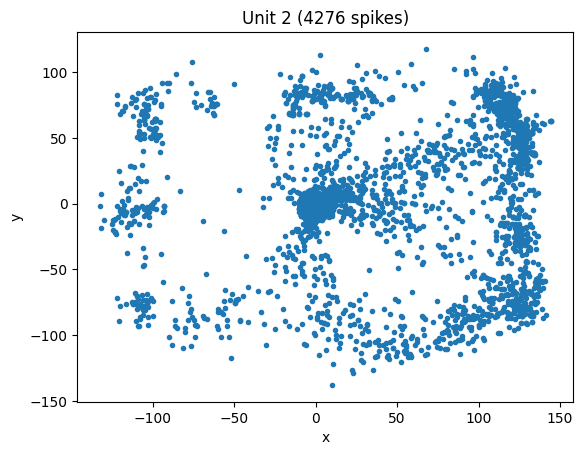

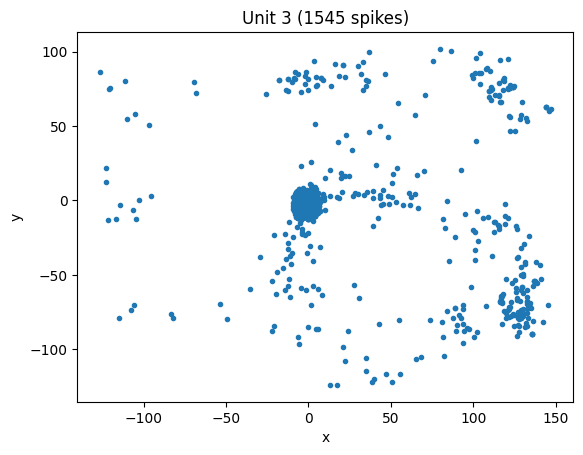

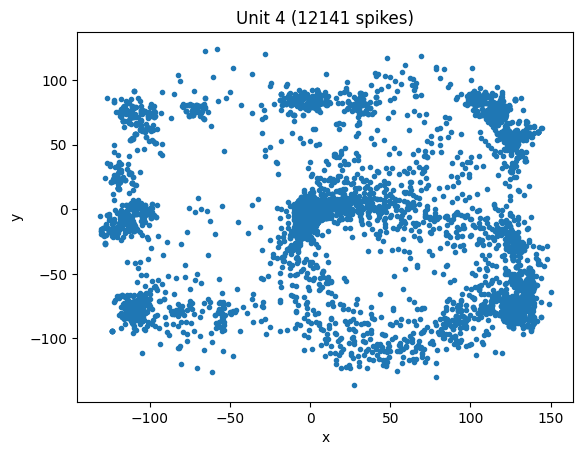

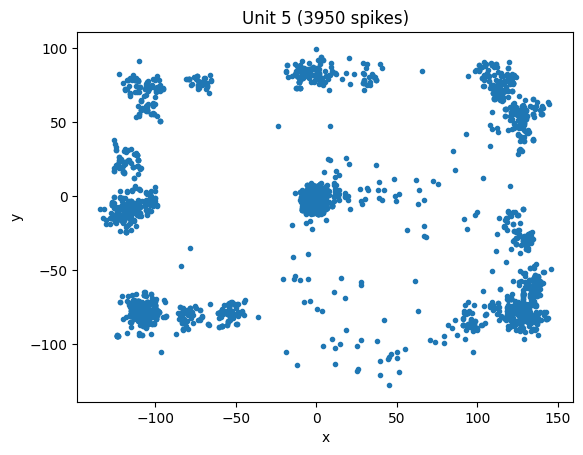

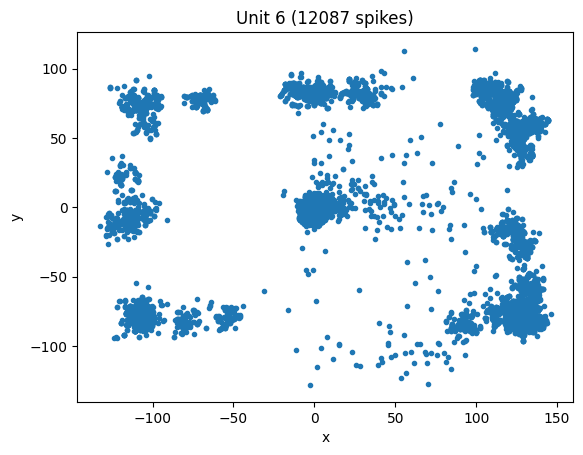

In [7]:
import numpy as np
from matplotlib import pyplot as plt
def _get_spike_times_indices(spike_times, timestamps):
    return np.searchsorted(timestamps, spike_times, side='left')
for j in range(len(spike_times_index)):
    i1 = 0 if j == 0 else spike_times_index[j-1]
    i2 = spike_times_index[j]
    spike_times0 = spike_times[i1:i2]
    spike_times0_indices = _get_spike_times_indices(spike_times0, timestamps)
    cursor_pos0 = cursor_pos[spike_times0_indices]
    fig = plt.figure()
    plt.plot(cursor_pos0[:, 0], cursor_pos0[:, 1], '.')
    title = 'Unit {} ({} spikes)'.format(j, len(spike_times0))
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    if j > 5:
        break